# Flats Uncleaned Dataset

In [998]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv('Data/surat_uncleaned.csv')

In [999]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price


In [1000]:
df.dtypes

property_name     object
areaWithType      object
square_feet       object
transaction       object
status            object
floor             object
furnishing        object
facing            object
description       object
price_per_sqft    object
price             object
dtype: object

In [1001]:
df.duplicated().sum()

np.int64(109)

In [1002]:
df.drop_duplicates(keep='first')

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price


In [1003]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64

In [1004]:
for col in df.select_dtypes(include = 'object'):
    df[col] = df[col].str.strip()

In [1005]:
df['transaction'].unique()

array(['New Property', 'Resale', 'Orchid Fantasia', 'Unfurnished',
       'Orchid Gardenia', 'Congo', 'Furnished', nan, 'Semi-Furnished',
       'Main Road, Garden/Park', '1', '3', '4', 'Yes', 'No',
       'Mahavir Nagar', '3 Covered', 'Shagun Residency', '2', 'Main Road',
       '10 m', 'Other', '1 Covered', 'Soham Elegance', 'Garden/Park',
       'Aakash Echo Point', 'Sundaram Residency', '5', 'Jolly Residency',
       'Mangalam Heights', 'Green City', 'Pool, Garden/Park, Main Road',
       '6', 'Co-operative Society', 'Vatsalya Bungalows', '20 Covered,',
       'Raghuvir Silverstone', '8 m', 'Casa Rivera'], dtype=object)

In [1006]:
df['transaction'] = df['transaction'].fillna(df['transaction'].mode()[0])

In [1007]:
df['transaction'].unique()

array(['New Property', 'Resale', 'Orchid Fantasia', 'Unfurnished',
       'Orchid Gardenia', 'Congo', 'Furnished', 'Semi-Furnished',
       'Main Road, Garden/Park', '1', '3', '4', 'Yes', 'No',
       'Mahavir Nagar', '3 Covered', 'Shagun Residency', '2', 'Main Road',
       '10 m', 'Other', '1 Covered', 'Soham Elegance', 'Garden/Park',
       'Aakash Echo Point', 'Sundaram Residency', '5', 'Jolly Residency',
       'Mangalam Heights', 'Green City', 'Pool, Garden/Park, Main Road',
       '6', 'Co-operative Society', 'Vatsalya Bungalows', '20 Covered,',
       'Raghuvir Silverstone', '8 m', 'Casa Rivera'], dtype=object)

In [1008]:
value_counts = df['transaction'].value_counts()

In [1009]:
valid_values = value_counts[value_counts > 1].index

df = df[df['transaction'].isin(valid_values)]

df['transaction'] = df['transaction'].replace('Main Road', df['transaction'].mode()[0])

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3667085621.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction'] = df['transaction'].replace('Main Road', df['transaction'].mode()[0])


In [1010]:
df['transaction'].value_counts()

transaction
Resale                  2307
New Property            1486
Unfurnished              404
Semi-Furnished            91
Furnished                 69
2                         24
3                         22
No                        20
Congo                     19
1                         16
Yes                       15
5                         11
4                          7
6                          3
Orchid Gardenia            3
Soham Elegance             3
Orchid Fantasia            2
Jolly Residency            2
Raghuvir Silverstone       2
Casa Rivera                2
Name: count, dtype: int64

In [1011]:
unrelated_values = ['Unfurnished', 'Semi-Furnished', 'Furnished', '2', '3', 'No', '1', 'Yes', '5', '4', '6', 'New Property']
df['transaction'] = df['transaction'].replace(unrelated_values, np.nan)

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\1135861801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction'] = df['transaction'].replace(unrelated_values, np.nan)


In [1012]:
df['transaction'].isnull().sum()

np.int64(2168)

In [1013]:
df['transaction'] = df['transaction'].fillna(df['transaction'].mode()[0])

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\1011748899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transaction'] = df['transaction'].fillna(df['transaction'].mode()[0])


In [1014]:
df['transaction'].value_counts()

transaction
Resale                  4475
Congo                     19
Orchid Gardenia            3
Soham Elegance             3
Orchid Fantasia            2
Jolly Residency            2
Raghuvir Silverstone       2
Casa Rivera                2
Name: count, dtype: int64

In [1015]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
status               1
floor               45
furnishing         330
facing             575
description       1363
price_per_sqft     366
price                0
dtype: int64

In [1016]:
df['status'].unique()

array(["Poss. by Oct '24", "Poss. by Jan '26", 'Ready to Move',
       'New Property', "Poss. by Dec '25", "Poss. by Jun '24",
       "Poss. by Sep '25", "Poss. by Feb '26", '1 out of 7',
       "Poss. by Jul '24", "Poss. by Dec '26", "Poss. by Apr '25",
       "Poss. by Jan '25", 'Freehold', '21 X 50.2', "Poss. by Dec '24",
       "Poss. by Aug '25", "Poss. by Feb '25", '3 out of 10', 'Resale',
       'Co-operative Society', '120 X 105', '3 out of 7',
       "Poss. by May '26", '36 X 15', "Poss. by Aug '24", '2',
       '3 out of 3', '52.5 X 32.1', '3 out of 5', '5 out of 5',
       '12 X 35.92', '13 out of 14', '7.29 X 14', '4 out of 5',
       'Ground out of 1', '3 out of 4', 'Ground out of 10',
       'Ground out of 2', '20 X 40', '16.4 X 60', '11 out of 14',
       '9.42 X 126', '25 X 12', nan, '2 out of 4', '54 X 15', '21 X 57',
       'Power Of Attorney', "Poss. by Jul '25", "Poss. by May '25",
       "Poss. by Mar '26", "Poss. by Jun '26", "Poss. by Nov '24",
       '26.7 X 55.

In [1017]:
valid_status = ['Ready to Move', 'New Property', 'Freehold', 'Resale', 'Power Of Attorney', 'Const. Age New Construction']
possession_pattern = r"^Poss\. by [A-Za-z]{3} '\d{2}$"
def clean_status(value):
    if pd.isnull(value):
        return np.nan
    if value in valid_status:
        return value
    if re.match(possession_pattern, value):
        return value
    return np.nan  # Unrelated values will be marked as missing

# Apply the cleaning function
df['status'] = df['status'].apply(clean_status)

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\2491285886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = df['status'].apply(clean_status)


In [1018]:
df['status'] = df['status'].fillna(df['status'].mode()[0])

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3305710467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = df['status'].fillna(df['status'].mode()[0])


In [1019]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
status               0
floor               45
furnishing         330
facing             575
description       1363
price_per_sqft     366
price                0
dtype: int64

In [1020]:
df['floor'].unique()

array(['5 out of 10', '6 out of 14', '5 out of 13', 'Unfurnished',
       'New Property', '7 out of 10', '3 out of 14', '6 out of 13',
       '1 out of 1', '1 out of 13', '4 out of 7', '3 out of 3',
       '2 out of 6', '3 out of 5', '2 out of 5', '3 out of 12',
       '5 out of 5', 'Resale', 'Ground out of 1',
       'Lower Basement out of 7', '1 out of 5', '7 out of 14',
       '9 out of 14', '5 out of 12', '7 out of 13', '1 out of 2',
       '2 out of 10', 'Freehold', '12 out of 14', '10 out of 14',
       '2 out of 12', '1 out of 4', '13 out of 14', '4 out of 14',
       '6 out of 10', '2 out of 4', '3 out of 4', '9 out of 13',
       'Upper Basement out of 5', '3 out of 10', '1 out of 3',
       '4 out of 4', 'Ground out of 2', 'Lower Basement out of 2',
       'Ground out of 4', nan, 'Ground out of 5', '4 out of 10',
       'Ground out of 14', 'Ground out of 6', '5 out of 6', '8 out of 9',
       '4 out of 5', '2 out of 7', '7 out of 7', 'Ground out of 3',
       '4 out of 8', '8

In [1021]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
status               0
floor               45
furnishing         330
facing             575
description       1363
price_per_sqft     366
price                0
dtype: int64

In [1022]:
df['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', '2', 'Anand Aspire', 'East', '1',
       'Furnished', nan, '3', '1 Covered,', '2 Covered', '1 Covered',
       'Freehold', 'West', '26 Covered', 'Main Road', 'No', 'North',
       '1 Open', '6', 'Co-operative Society', '> 10', '4',
       'Nilkanth Seven Homes', 'Aagam Navkar', '10 Open',
       'Vinayak Enclave', '5 Covered,', 'South -West',
       'Pool, Garden/Park, Main Road', 'Garden/Park, Main Road', '7 m',
       '30 m', '50 Covered,', 'South', '12 m', 'Yes', 'Gruham Luxuria',
       '2 Covered,', 'Congo', 'Prayosha Shine', 'North - East',
       'Vaishnodevi Ideal Homes', 'Santvan Lexon', 'Sangini Epitome',
       '100 Covered', 'Nirvana Gladiolus', '7', '5 Covered', '5',
       'Raghuvir Spalex', '50 Open', 'South - East', 'North - West',
       '20 m', '20 Open', 'Garden/Park', '10 m', 'Sattvam',
       'Pramukh Amaya', 'Sun Sarvam', '3 Covered', '2 Open', '6 m',
       'Avadh Kimberly', 'Happy Glorious', 'DMD Aura', 'Freedom Tower',
  

In [1023]:
furnishing_values_keep = ['Unfurnished', 'Semi-Furnished', 'Furnished']
if 'furnishing' != furnishing_values_keep:
    df['furnishing'] = df['furnishing'].where(df['furnishing'].isin(furnishing_values_keep), np.nan)
df['furnishing'] = df['furnishing'].fillna('Unknown')

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3740550752.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnishing'] = df['furnishing'].where(df['furnishing'].isin(furnishing_values_keep), np.nan)
C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3740550752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnishing'] = df['furnishing'].fillna('Unknown')


In [1024]:
df['furnishing'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Unknown', 'Furnished'],
      dtype=object)

In [1025]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
status               0
floor               45
furnishing           0
facing             575
description       1363
price_per_sqft     366
price                0
dtype: int64

In [1026]:
df['facing'].unique()

array(['West', 'South -West', 'East', '2', 'Main Road', nan,
       'North - East', 'South - East', '1', 'Freehold', 'Garden/Park',
       '3', 'North - West', 'South', '6', 'Co-operative Society',
       'Garden/Park, Main Road', '1 Covered', 'No', '30 m', 'North',
       'Varni Siddheshwar Heights', '5', 'Salasar Icon', 'Green Valley',
       'Shyam enclave', 'Rajhans Platinum', 'Vitthal Bunglows', '1 Open',
       'Royal Nest', 'Rajhans Wings', '2 Open',
       'Gordhan Green Valley Mangalam Park Bldg S',
       'Apt Swaminagar Society', 'Swagat Clifton', 'Akash',
       'Green Arcade Phase 1 And 2', 'Satyam Tower', '4',
       'Suryanjali Residency', 'GHB Mukhya Mantri Gruh Yojana',
       'Vibrant Eco Park', 'Madhav Residency', 'Shiv Drashti Residency',
       'Gruham Luxuria', 'SHANKHESHWER COMPLAX', 'JT Stuti Highland',
       'Times Galaxy', '100 m', 'Savani Prayosha Pride',
       'Shayona Janki Residency', 'Sundaram Residency', '6 m',
       'Silicon Palm', 'Raj Abhishek City

In [1027]:
face_patt = r"^\d+(\s+[a-zA-Z]+)?$"

not_face = []

for fc in df['facing']:
    if re.match(face_patt, str(fc).strip()):
        not_face.append(fc)

print(set(not_face))

df['facing'] = df['facing'].replace(not_face, np.nan)
df['facing'] = df['facing'].fillna(df['facing'].mode()[0])

{'25 m', '900 m', '20275 m', '10 m', '4', '1 m', '1', '12 m', '1 Open', '9', '4 m', '1 Covered', '6', '150 m', '3 Covered', '2 Covered', '7', '6 m', '15 m', '2 Open', '3', '2 m', '45 X', '135 X', '8 m', '30 m', '5', '2', '100 m', '7 m', '131 X', '20 m'}


C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\725042694.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facing'] = df['facing'].replace(not_face, np.nan)
C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\725042694.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facing'] = df['facing'].fillna(df['facing'].mode()[0])


In [1028]:

print(df['facing'].unique())

['West' 'South -West' 'East' 'Main Road' 'North - East' 'South - East'
 'Freehold' 'Garden/Park' 'North - West' 'South' 'Co-operative Society'
 'Garden/Park, Main Road' 'No' 'North' 'Varni Siddheshwar Heights'
 'Salasar Icon' 'Green Valley' 'Shyam enclave' 'Rajhans Platinum'
 'Vitthal Bunglows' 'Royal Nest' 'Rajhans Wings'
 'Gordhan Green Valley Mangalam Park Bldg S' 'Apt Swaminagar Society'
 'Swagat Clifton' 'Akash' 'Green Arcade Phase 1 And 2' 'Satyam Tower'
 'Suryanjali Residency' 'GHB Mukhya Mantri Gruh Yojana' 'Vibrant Eco Park'
 'Madhav Residency' 'Shiv Drashti Residency' 'Gruham Luxuria'
 'SHANKHESHWER COMPLAX' 'JT Stuti Highland' 'Times Galaxy'
 'Savani Prayosha Pride' 'Shayona Janki Residency' 'Sundaram Residency'
 'Silicon Palm' 'Raj Abhishek City Homes' 'Dhvani Royal Residency'
 'Residency' 'Pan Sharanam' 'Gruham Royal Park' 'Rajhans Swapna'
 'Panchtatva Residency' 'Manvay Residency' 'Prayosha Shine' 'Yes'
 'Swapna Villa 2 Phase 2' 'Green City' 'Rajhans Apple' 'Sai Residency

In [1029]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
status               0
floor               45
furnishing           0
facing               0
description       1363
price_per_sqft     366
price                0
dtype: int64

In [1030]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
status               0
floor               45
furnishing           0
facing               0
description       1363
price_per_sqft     366
price                0
dtype: int64

In [1031]:
df['price_per_sqft'] = df['price_per_sqft'].fillna(df['price_per_sqft'].mode()[0])
df['price_per_sqft'].unique()

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\1748970107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft'] = df['price_per_sqft'].fillna(df['price_per_sqft'].mode()[0])


array(['₹2,891 per sqft', '₹3,551 per sqft', '₹3,800 per sqft', ...,
       '₹8,512 per sqft', '₹8,200 per sqft', '₹5,756 per sqft'],
      dtype=object)

In [1032]:
df['price_per_sqft'].isnull().sum()

np.int64(0)

In [1033]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,Resale,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,Unknown,East,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...","₹5,000 per sqft",Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,"₹5,000 per sqft",Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...","₹5,000 per sqft",Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,Resale,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...","₹5,000 per sqft",Call for Price


In [1034]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction          0
status               0
floor               45
furnishing           0
facing               0
description       1363
price_per_sqft       0
price                0
dtype: int64

In [1035]:
df['price'].unique()

array(['₹33.8 Lac', '₹45.4 Lac', '₹44.6 Lac', '₹47 Lac', '₹45 Lac',
       '₹43.2 Lac', '₹42.1 Lac', '₹44.1 Lac', '₹44.3 Lac', '₹40 Lac',
       '₹44 Lac', '₹12.5 Lac', '₹50 Lac', '₹35.8 Lac', '₹26.5 Lac',
       '₹42 Lac', '₹43 Lac', '₹20 Lac', '₹37 Lac', '₹29 Lac', '₹38 Lac',
       '₹13 Lac', '₹46.5 Lac', '₹41.6 Lac', '₹33.5 Lac', '₹42.5 Lac',
       '₹48 Lac', '₹32 Lac', '₹35 Lac', '₹46.2 Lac', '₹38.5 Lac',
       '₹23 Lac', '₹24 Lac', '₹28 Lac', '₹35.7 Lac', '₹36.5 Lac',
       '₹36 Lac', '₹43.6 Lac', '₹25 Lac', '₹41 Lac', '₹28.5 Lac',
       '₹9 Lac', '₹30 Lac', '₹39.5 Lac', '₹21.5 Lac', '₹10.5 Lac',
       '₹18 Lac', '₹10 Lac', '₹23.5 Lac', '₹16.3 Lac', '₹13.5 Lac',
       '₹49 Lac', '₹21 Lac', '₹39 Lac', '₹16 Lac', '₹27 Lac', '₹15 Lac',
       '₹39.9 Lac', '₹7.5 Lac', '₹12.8 Lac', '₹9.5 Lac', '₹31.5 Lac',
       '₹46 Lac', '₹6 Lac', '₹34 Lac', '₹22 Lac', '₹19 Lac', '₹8.5 Lac',
       '₹11 Lac', '₹16.5 Lac', '₹17 Lac', '₹14 Lac', '₹20.5 Lac',
       '₹21.7 Lac', '₹27.5 Lac', '₹3

In [1036]:
price_pattern = [r"^₹\d+(\.\d+)? Lac$", r"^₹\d+(\.\d+)? Cr$"]
not_same =[]

for p in df['price']:
    if not any(re.match(pattern, str(p)) for pattern in price_pattern):
        not_same.append(p)
print(set(not_same))

{'Call for Price'}


In [1037]:
df['price'] = df['price'].replace(not_same, np.nan)
df['price'] = df['price'].fillna(df['price'].mode()[0])

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\335864936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].replace(not_same, np.nan)
C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\335864936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].fillna(df['price'].mode()[0])


In [1038]:
'Call for Price' in df['price']

False

In [1039]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,Resale,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,Unknown,East,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...","₹5,000 per sqft",₹50 Lac
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,"₹5,000 per sqft",₹50 Lac
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...","₹5,000 per sqft",₹50 Lac
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,Resale,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...","₹5,000 per sqft",₹50 Lac


In [1040]:
df.duplicated().sum()

np.int64(109)

In [1041]:
df = df.drop_duplicates(keep = 'first')

In [1042]:
df['areaWithType'].unique()

array(['Carpet Area', 'Super Area', 'Plot Area', 'Built Area',
       'Transaction', 'Status'], dtype=object)

In [1043]:
areaWithType_unrelated_values = ['Transaction', 'Status']
df['areaWithType'] = df['areaWithType'].replace(areaWithType_unrelated_values, np.nan)
df['areaWithType'] = df['areaWithType'].fillna(df['areaWithType'].mode()[0])

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3397294098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['areaWithType'] = df['areaWithType'].replace(areaWithType_unrelated_values, np.nan)
C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3397294098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['areaWithType'] = df['areaWithType'].fillna(df['areaWithType'].mode()[0])


In [1044]:
df['square_feet'].unique()

array(['644 sqft', '1278 sqft', '1173 sqft', ..., '2545 sqft',
       '5175 sqft', '2620 sqft'], dtype=object)

In [1045]:
square_feet_patt = r"^\d+\s*sqft$"
not_include = []
for s in df['square_feet']:
    if not re.match(square_feet_patt, str(s)):
        not_include.append(s)
    print(set(s))

{'q', ' ', 's', '4', '6', 't', 'f'}
{'1', 'q', ' ', '7', '2', '8', 's', 't', 'f'}
{'3', '1', 'q', ' ', '7', 's', 't', 'f'}
{'q', ' ', '0', '7', 's', 't', 'f'}
{'1', 'q', '5', ' ', '0', '2', 's', 't', 'f'}
{'1', 'q', '5', ' ', '2', 's', '6', 't', 'f'}
{'1', 'q', ' ', '0', '4', 's', 't', 'f'}
{'q', ' ', '0', '7', 's', 't', 'f'}
{'1', 'q', ' ', '0', '8', 's', 't', 'f'}
{'q', ' ', '0', '7', '2', 's', 't', 'f'}
{'q', ' ', '7', '8', '4', 's', 't', 'f'}
{'q', ' ', '0', '8', '4', 's', 't', 'f'}
{'1', 'q', '5', ' ', '0', 's', '6', 't', 'f'}
{'q', ' ', '7', '8', '4', 's', 't', 'f'}
{'1', 'q', '5', ' ', 's', 't', 'f'}
{'q', '5', ' ', '0', '8', 's', 't', 'f'}
{'1', 'q', ' ', '0', '8', 's', 't', 'f'}
{'q', ' ', '0', '8', 's', 't', 'f'}
{'1', 'q', ' ', '0', 's', 't', 'f'}
{'3', '1', 'q', ' ', '7', 's', 't', 'f'}
{'6', '1', 'q', ' ', '8', 's', 't', 'f'}
{'q', ' ', '5', '9', '0', 's', 't', 'f'}
{'1', 'q', '5', ' ', '0', 's', 't', 'f'}
{'3', 'q', ' ', '2', '4', 's', 't', 'f'}
{'3', 'q', '5', ' ', '0', 

In [1046]:
df['square_feet'] = df['square_feet'].replace(not_include, np.nan)
df['square_feet'] = df['square_feet'].fillna(df['square_feet'].mode()[0])

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\780763359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['square_feet'] = df['square_feet'].replace(not_include, np.nan)
C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\780763359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['square_feet'] = df['square_feet'].fillna(df['square_feet'].mode()[0])


In [1047]:
df['status'].unique()

array(["Poss. by Oct '24", "Poss. by Jan '26", 'Ready to Move',
       'New Property', "Poss. by Dec '25", "Poss. by Jun '24",
       "Poss. by Sep '25", "Poss. by Feb '26", "Poss. by Jul '24",
       "Poss. by Dec '26", "Poss. by Apr '25", "Poss. by Jan '25",
       'Freehold', "Poss. by Dec '24", "Poss. by Aug '25",
       "Poss. by Feb '25", 'Resale', "Poss. by May '26",
       "Poss. by Aug '24", 'Power Of Attorney', "Poss. by Jul '25",
       "Poss. by May '25", "Poss. by Mar '26", "Poss. by Jun '26",
       "Poss. by Nov '24", "Poss. by Jun '25", "Poss. by Mar '25",
       "Poss. by Apr '26", "Poss. by Sep '24", "Poss. by Nov '25",
       'Const. Age New Construction', "Poss. by Oct '25",
       "Poss. by Dec '28", "Poss. by Sep '26", "Poss. by Dec '27",
       "Poss. by Oct '26", "Poss. by Jan '27", "Poss. by Apr '27",
       "Poss. by May '27", "Poss. by Mar '27", "Poss. by Jul '26",
       "Poss. by Aug '26", "Poss. by Jul '27", "Poss. by Jun '27",
       "Poss. by Nov '26", "

In [1048]:
status_non_related_values = ['Power Of Attorney', 'Ready to Move', 'New Property', 'Freehold', 'Resale', 'Const. Age New Construction']
df['status'] = df['status'].replace(status_non_related_values, np.nan)
df['status'] = df['status'].fillna(df['status'].mode()[0])

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3325080930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = df['status'].replace(status_non_related_values, np.nan)
C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3325080930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = df['status'].fillna(df['status'].mode()[0])


In [1049]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Poss. by Dec '24,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,Resale,Poss. by Dec '24,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,Poss. by Dec '24,Unfurnished,Unknown,East,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...","₹5,000 per sqft",₹50 Lac
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,"₹5,000 per sqft",₹50 Lac
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...","₹5,000 per sqft",₹50 Lac
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,Resale,Poss. by Dec '24,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...","₹5,000 per sqft",₹50 Lac


In [1050]:
df['transaction'].unique()

array(['Resale', 'Orchid Fantasia', 'Orchid Gardenia', 'Congo',
       'Soham Elegance', 'Jolly Residency', 'Raghuvir Silverstone',
       'Casa Rivera'], dtype=object)

In [1051]:
df['floor'].unique()

array(['5 out of 10', '6 out of 14', '5 out of 13', 'Unfurnished',
       'New Property', '7 out of 10', '3 out of 14', '6 out of 13',
       '1 out of 1', '1 out of 13', '4 out of 7', '3 out of 3',
       '2 out of 6', '3 out of 5', '2 out of 5', '3 out of 12',
       '5 out of 5', 'Resale', 'Ground out of 1',
       'Lower Basement out of 7', '1 out of 5', '7 out of 14',
       '9 out of 14', '5 out of 12', '7 out of 13', '1 out of 2',
       '2 out of 10', 'Freehold', '12 out of 14', '10 out of 14',
       '2 out of 12', '1 out of 4', '13 out of 14', '4 out of 14',
       '6 out of 10', '2 out of 4', '3 out of 4', '9 out of 13',
       'Upper Basement out of 5', '3 out of 10', '1 out of 3',
       '4 out of 4', 'Ground out of 2', 'Lower Basement out of 2',
       'Ground out of 4', nan, 'Ground out of 5', '4 out of 10',
       'Ground out of 14', 'Ground out of 6', '5 out of 6', '8 out of 9',
       '4 out of 5', '2 out of 7', '7 out of 7', 'Ground out of 3',
       '4 out of 8', '8

In [1052]:
facing_non_valid = ['Yes', '1 Covered,', '45 X 14 ft Sqft', 'No']
df['facing'] = df['facing'].replace(facing_non_valid, np.nan)
df['facing'] = df['facing'].fillna(df['facing'].mode()[0])

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\526736296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facing'] = df['facing'].replace(facing_non_valid, np.nan)
C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\526736296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['facing'] = df['facing'].fillna(df['facing'].mode()[0])


In [1053]:
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Poss. by Dec '24,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,Resale,Poss. by Dec '24,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,Poss. by Dec '24,Unfurnished,Unknown,East,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...","₹5,000 per sqft",₹50 Lac
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,"₹5,000 per sqft",₹50 Lac
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...","₹5,000 per sqft",₹50 Lac
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,Resale,Poss. by Dec '24,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...","₹5,000 per sqft",₹50 Lac


In [1054]:
df[['area_value', 'area_unit']] = df['square_feet'].str.extract(r'(\d+)\s*(\w+)')

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3520271679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['area_value', 'area_unit']] = df['square_feet'].str.extract(r'(\d+)\s*(\w+)')
C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3520271679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['area_value', 'area_unit']] = df['square_feet'].str.extract(r'(\d+)\s*(\w+)')


In [1055]:
df = df.drop('square_feet', axis=1)

In [1056]:
df['floor'].isnull().sum()

np.int64(45)

In [1057]:
floor_patt = r"^\d+\s+out\s+of\s+\d+$"
not_floor = []
for val in df['floor']:
    if not re.match(floor_patt, str(val)):
        not_floor.append(val)
    print(set(not_floor))

set()
set()
set()
set()
{'Unfurnished'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'New Property'}
{'Unfurnished', 'Resale', 'New Property'}
{'Unfurnished', 'Resale', 'New Property', 'Ground out of 1'}
{'Lower Basement out of 7', 'Ground out of 1', 'New Property', 'Resale', 'Unfurnished'}
{'Lower Basement out of 7', 'Ground out of 1', 'New Property', 'Resale', 'Unfurnished'}
{'Lower Basement out of 7', 'Ground out of 1', 'New Property', 'Resale', 'Unfurnished'}
{'Lower Basement out of 7', 'Ground out of 1', 'N

In [1058]:
df['floor'] = df['floor'].replace(not_floor, np.nan)

In [1059]:
df['floor'].isnull().sum()

np.int64(1232)

In [1060]:
df['floor'] = df['floor'].fillna(df['floor'].mode()[0])

In [1061]:
df['floor'].unique()

array(['5 out of 10', '6 out of 14', '5 out of 13', '7 out of 10',
       '3 out of 14', '6 out of 13', '1 out of 1', '1 out of 13',
       '4 out of 7', '3 out of 3', '2 out of 6', '3 out of 5',
       '2 out of 5', '3 out of 12', '5 out of 5', '1 out of 5',
       '7 out of 14', '9 out of 14', '5 out of 12', '7 out of 13',
       '1 out of 2', '2 out of 10', '12 out of 14', '10 out of 14',
       '2 out of 12', '1 out of 4', '13 out of 14', '4 out of 14',
       '6 out of 10', '2 out of 4', '3 out of 4', '9 out of 13',
       '3 out of 10', '1 out of 3', '4 out of 4', '4 out of 10',
       '5 out of 6', '8 out of 9', '4 out of 5', '2 out of 7',
       '7 out of 7', '4 out of 8', '8 out of 14', '6 out of 7',
       '7 out of 11', '2 out of 3', '1 out of 7', '1 out of 6',
       '9 out of 11', '14 out of 14', '5 out of 14', '1 out of 8',
       '5 out of 7', '8 out of 12', '2 out of 2', '7 out of 12',
       '3 out of 6', '1 out of 12', '16 out of 19', '13 out of 13',
       '6 out of 

In [1062]:
df

,property_name,areaWithType,transaction,status,floor,furnishing,facing,description,price_per_sqft,price,area_value,area_unit
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac,644,sqft
1,2 BHK Apartment for Sale in Althan Surat,Super Area,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac,1278,sqft
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,Resale,Poss. by Dec '24,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac,1173,sqft
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,Resale,Poss. by Dec '24,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac,700,sqft
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,Orchid Fantasia,Poss. by Dec '24,5 out of 13,Unknown,East,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac,1250,sqft
...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...","₹5,000 per sqft",₹50 Lac,2000,sqft
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,"₹5,000 per sqft",₹50 Lac,3600,sqft
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...","₹5,000 per sqft",₹50 Lac,2250,sqft
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,Resale,Poss. by Dec '24,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...","₹5,000 per sqft",₹50 Lac,3450,sqft


In [1063]:
df = df.drop('description', axis=1)

In [1064]:
df

,property_name,areaWithType,transaction,status,floor,furnishing,facing,price_per_sqft,price,area_value,area_unit
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac,644,sqft
1,2 BHK Apartment for Sale in Althan Surat,Super Area,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac,1278,sqft
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,Resale,Poss. by Dec '24,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac,1173,sqft
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,Resale,Poss. by Dec '24,6 out of 14,Unfurnished,East,"₹3,966 per sqft",₹47 Lac,700,sqft
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,Orchid Fantasia,Poss. by Dec '24,5 out of 13,Unknown,East,"₹3,600 per sqft",₹45 Lac,1250,sqft
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"₹5,000 per sqft",₹50 Lac,2000,sqft
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,"₹5,000 per sqft",₹50 Lac,3600,sqft
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"₹5,000 per sqft",₹50 Lac,2250,sqft
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,Resale,Poss. by Dec '24,7 out of 18,Unfurnished,North - West,"₹5,000 per sqft",₹50 Lac,3450,sqft


In [1065]:
df[['currency', 'per_sqft_price']] = df['price_per_sqft'].str.extract(r'(^[^\d]+)([\d,]+)')


In [1066]:
df

,property_name,areaWithType,transaction,status,floor,furnishing,facing,price_per_sqft,price,area_value,area_unit,currency,per_sqft_price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,"₹2,891 per sqft",₹33.8 Lac,644,sqft,₹,"2,891"
1,2 BHK Apartment for Sale in Althan Surat,Super Area,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,"₹3,551 per sqft",₹45.4 Lac,1278,sqft,₹,"3,551"
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,Resale,Poss. by Dec '24,5 out of 13,Semi-Furnished,East,"₹3,800 per sqft",₹44.6 Lac,1173,sqft,₹,"3,800"
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,Resale,Poss. by Dec '24,6 out of 14,Unfurnished,East,"₹3,966 per sqft",₹47 Lac,700,sqft,₹,"3,966"
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,Orchid Fantasia,Poss. by Dec '24,5 out of 13,Unknown,East,"₹3,600 per sqft",₹45 Lac,1250,sqft,₹,"3,600"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"₹5,000 per sqft",₹50 Lac,2000,sqft,₹,"5,000"
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,"₹5,000 per sqft",₹50 Lac,3600,sqft,₹,"5,000"
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"₹5,000 per sqft",₹50 Lac,2250,sqft,₹,"5,000"
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,Resale,Poss. by Dec '24,7 out of 18,Unfurnished,North - West,"₹5,000 per sqft",₹50 Lac,3450,sqft,₹,"5,000"


In [1067]:
df['currency'].isnull().sum()

np.int64(0)

In [1068]:
df['per_sqft_price'].isnull().sum()

np.int64(0)

In [1069]:
df = df.drop('price_per_sqft', axis=1)

In [1070]:
df

,property_name,areaWithType,transaction,status,floor,furnishing,facing,price,area_value,area_unit,currency,per_sqft_price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,₹33.8 Lac,644,sqft,₹,"2,891"
1,2 BHK Apartment for Sale in Althan Surat,Super Area,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,₹45.4 Lac,1278,sqft,₹,"3,551"
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,Resale,Poss. by Dec '24,5 out of 13,Semi-Furnished,East,₹44.6 Lac,1173,sqft,₹,"3,800"
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,Resale,Poss. by Dec '24,6 out of 14,Unfurnished,East,₹47 Lac,700,sqft,₹,"3,966"
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,Orchid Fantasia,Poss. by Dec '24,5 out of 13,Unknown,East,₹45 Lac,1250,sqft,₹,"3,600"
...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,₹50 Lac,2000,sqft,₹,"5,000"
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,₹50 Lac,3600,sqft,₹,"5,000"
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,₹50 Lac,2250,sqft,₹,"5,000"
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,Resale,Poss. by Dec '24,7 out of 18,Unfurnished,North - West,₹50 Lac,3450,sqft,₹,"5,000"


In [1071]:
df.to_excel('ww.xlsx', index=False)

In [1072]:
df[['prop_price', 'unit']] = df['price'].str.extract(r'[\D]*([\d.,]+)\s*(\w+)?')

In [1073]:
df

,property_name,areaWithType,transaction,status,floor,furnishing,facing,price,area_value,area_unit,currency,per_sqft_price,prop_price,unit
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,₹33.8 Lac,644,sqft,₹,"2,891",33.8,Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,₹45.4 Lac,1278,sqft,₹,"3,551",45.4,Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,Resale,Poss. by Dec '24,5 out of 13,Semi-Furnished,East,₹44.6 Lac,1173,sqft,₹,"3,800",44.6,Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,Resale,Poss. by Dec '24,6 out of 14,Unfurnished,East,₹47 Lac,700,sqft,₹,"3,966",47,Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,Orchid Fantasia,Poss. by Dec '24,5 out of 13,Unknown,East,₹45 Lac,1250,sqft,₹,"3,600",45,Lac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,₹50 Lac,2000,sqft,₹,"5,000",50,Lac
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,₹50 Lac,3600,sqft,₹,"5,000",50,Lac
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,₹50 Lac,2250,sqft,₹,"5,000",50,Lac
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,Resale,Poss. by Dec '24,7 out of 18,Unfurnished,North - West,₹50 Lac,3450,sqft,₹,"5,000",50,Lac


In [1074]:
df['prop_price'].isnull().sum()

np.int64(0)

In [1075]:
df['unit'].isnull().sum()

np.int64(0)

In [1076]:
df = df.drop('price', axis=1)

In [1077]:
df

,property_name,areaWithType,transaction,status,floor,furnishing,facing,area_value,area_unit,currency,per_sqft_price,prop_price,unit
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,644,sqft,₹,"2,891",33.8,Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,1278,sqft,₹,"3,551",45.4,Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,Resale,Poss. by Dec '24,5 out of 13,Semi-Furnished,East,1173,sqft,₹,"3,800",44.6,Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,Resale,Poss. by Dec '24,6 out of 14,Unfurnished,East,700,sqft,₹,"3,966",47,Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,Orchid Fantasia,Poss. by Dec '24,5 out of 13,Unknown,East,1250,sqft,₹,"3,600",45,Lac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,2000,sqft,₹,"5,000",50,Lac
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,3600,sqft,₹,"5,000",50,Lac
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,2250,sqft,₹,"5,000",50,Lac
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,Resale,Poss. by Dec '24,7 out of 18,Unfurnished,North - West,3450,sqft,₹,"5,000",50,Lac


In [1078]:
df.duplicated().sum()

np.int64(21)

In [1079]:
df = df.drop_duplicates(keep='first')

In [1080]:
df.duplicated().sum()

np.int64(0)

In [1081]:
df['per_sqft_price'] = df['per_sqft_price'].str.replace(',', '', regex=False)

C:\Users\osamasaid\AppData\Local\Temp\ipykernel_21648\3081631277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['per_sqft_price'] = df['per_sqft_price'].str.replace(',', '', regex=False)


In [1082]:
df = df.astype({
    'property_name' : 'object',
    'areaWithType' : 'object',
    'transaction' : 'object',
    'status' : 'object',
    'floor' : 'object',
    'furnishing' : 'object',
    'facing' : 'object',
    'area_value' : 'int',
    'area_unit' : 'object',
    'per_sqft_price' : 'int',
    'currency' : 'object',
    'prop_price' : 'float',
    'unit' : 'object'
})

In [1083]:
df

,property_name,areaWithType,transaction,status,floor,furnishing,facing,area_value,area_unit,currency,per_sqft_price,prop_price,unit
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,Resale,Poss. by Oct '24,5 out of 10,Unfurnished,West,644,sqft,₹,2891,33.8,Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,Resale,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,1278,sqft,₹,3551,45.4,Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,Resale,Poss. by Dec '24,5 out of 13,Semi-Furnished,East,1173,sqft,₹,3800,44.6,Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,Resale,Poss. by Dec '24,6 out of 14,Unfurnished,East,700,sqft,₹,3966,47.0,Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,Orchid Fantasia,Poss. by Dec '24,5 out of 13,Unknown,East,1250,sqft,₹,3600,45.0,Lac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,Resale,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,2000,sqft,₹,5000,50.0,Lac
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,Resale,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,3600,sqft,₹,5000,50.0,Lac
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,Resale,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,2250,sqft,₹,5000,50.0,Lac
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,Resale,Poss. by Dec '24,7 out of 18,Unfurnished,North - West,3450,sqft,₹,5000,50.0,Lac


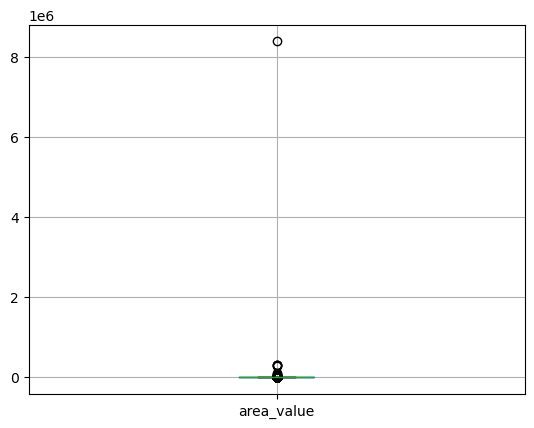

In [1084]:
df.boxplot('area_value')
plt.show()

In [1085]:
Q1 = df['area_value'].quantile(0.25)
Q3 = df['area_value'].quantile(0.75)
IQR = Q3 - Q1                     
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['area_value'] < lower_bound) | (df['area_value'] > upper_bound)]
print(IQR)

1100.0


In [1086]:
df = df[(df['area_value'] >= lower_bound) & (df['area_value'] <= upper_bound)]

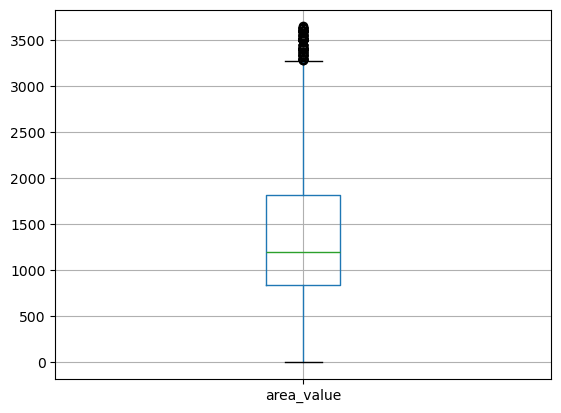

In [1087]:
df.boxplot('area_value')
plt.show()

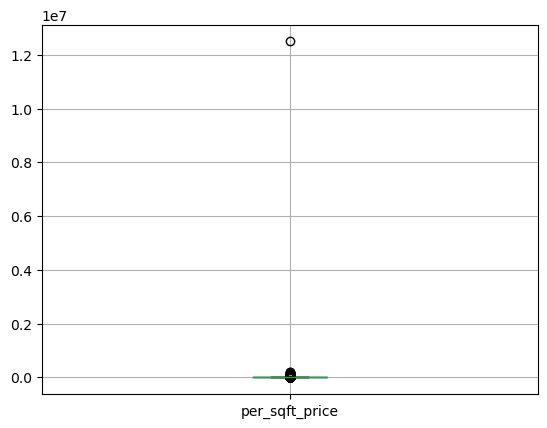

In [1088]:
df.boxplot('per_sqft_price')
plt.show()

In [1089]:
Q1 = df['per_sqft_price'].quantile(0.25)
Q3 = df['per_sqft_price'].quantile(0.75)
IQR = Q3 - Q1                     
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['per_sqft_price'] < lower_bound) | (df['per_sqft_price'] > upper_bound)]
print(IQR)

2138.5


In [1090]:
df = df[(df['per_sqft_price'] >= lower_bound) & (df['per_sqft_price'] <= upper_bound)]

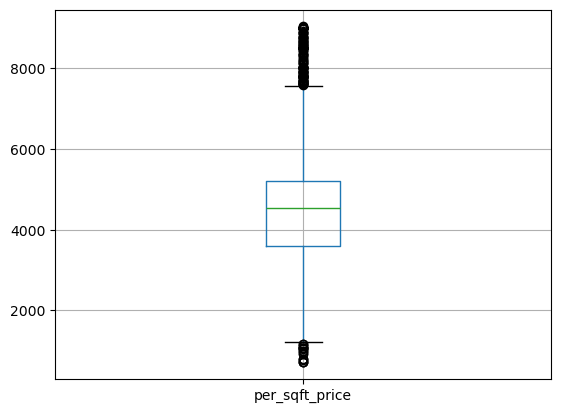

In [1091]:
df.boxplot('per_sqft_price')
plt.show()

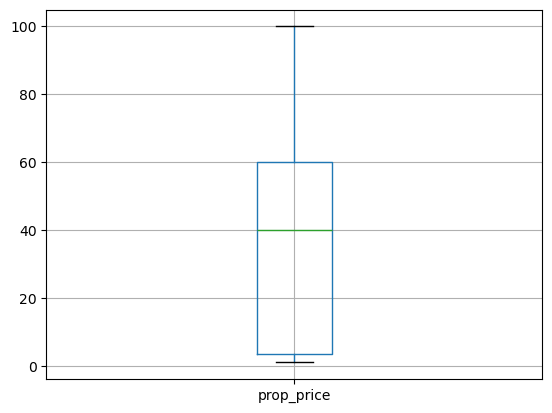

In [1092]:
df.boxplot('prop_price')
plt.show()

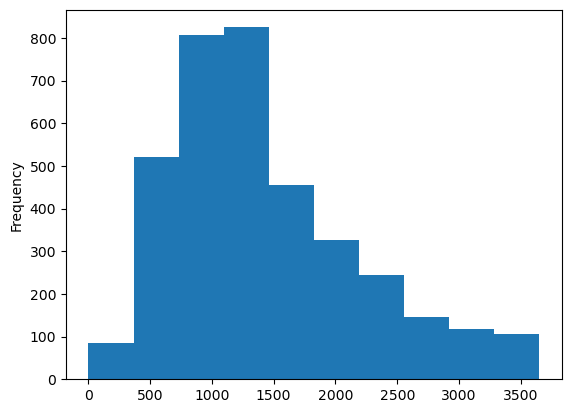

In [1093]:
df['area_value'].plot (kind='hist')
plt.show()

In [1094]:
en = LabelEncoder()

In [1095]:
categorical_col = df.select_dtypes(include = ['object']).columns

In [1096]:
for col in categorical_col:
     df[col] = en.fit_transform(df[col])

In [1097]:
df

,property_name,areaWithType,transaction,status,floor,furnishing,facing,area_value,area_unit,currency,per_sqft_price,prop_price,unit
0,335,1,5,34,104,2,133,644,0,0,2891,33.8,1
1,288,3,5,14,123,2,116,1278,0,0,3551,45.4,1
2,447,3,5,6,107,1,19,1173,0,0,3800,44.6,1
3,374,1,5,6,123,2,19,700,0,0,3966,47.0,1
4,444,3,2,6,107,3,19,1250,0,0,3600,45.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,1342,1,5,7,120,2,60,1870,0,0,5000,50.0,1
4520,1424,1,5,8,106,2,115,2000,0,0,5000,50.0,1
4521,1309,3,5,7,110,2,115,3600,0,0,5000,50.0,1
4522,1398,1,5,7,135,2,60,2250,0,0,5000,50.0,1


In [1108]:
X = df.drop('prop_price', axis=1)
y = df['prop_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

--- Linear Regression Results ---
Mean Squared Error (MSE): 193.77
R-squared (R2): 0.76
